<a href="https://colab.research.google.com/github/jwilliams2023/Machine-Learning-Assignments/blob/main/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dependencies

- numpy
- pandas
- matplotlib
- seaborn
- scikit-learn
- nltk
- gensim
- datasets
- transformers
- torch - (CUDA 11.8 version for GPU support)
- evaluate


In [2]:
%pip install numpy pandas matplotlib seaborn scikit-learn nltk gensim datasets transformers

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


## Part 1 Word Embeddings and N-gram

In [3]:
import gensim.downloader as api
from gensim.models import FastText
from gensim.test.utils import common_texts

print(common_texts[0])
print(len(common_texts[0]))

['human', 'interface', 'computer']
3


### 1.1 (a) - Glove-twitter-50D word2vec and compute nxn matrices

In [4]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd


In [5]:
words = ["Dog", "Bark", "Tree", "Bank", "River", "Money"]

In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

#computes the cosine similarity matrix for a list of words using a word embedding model
def compute_similarity_matrix(model, words):
    vectors = []
    labels = [] 

    for word in words:
        key = word.lower()
        if key in model:
            vectors.append(model[key])  #append if the word exists
            labels.append(word)         #keep original word as label
        else:
            print(f"{word} not found")

    #compute cosine similarity across all word vectors
    similarity_matrix = cosine_similarity(vectors)

    #convert to dataframe with labels as index and columns
    df = pd.DataFrame(similarity_matrix, index=labels, columns=labels)
    return df

In [7]:
if 'model' not in globals():
    model = api.load('glove-twitter-50')

In [8]:
similarity_matrix = compute_similarity_matrix(model, words)
display(similarity_matrix)

,Dog,Bark,Tree,Bank,River,Money
Dog,1.000000,0.593780,0.713751,0.348236,0.401201,0.575133
Bark,0.593780,1.000000,0.545873,0.040109,0.266635,0.290985
Tree,0.713751,0.545873,1.000000,0.349456,0.487116,0.510081
Bank,0.348236,0.040109,0.349456,1.000000,0.319922,0.674656
River,0.401201,0.266635,0.487116,0.319922,1.000000,0.337800
Money,0.575133,0.290985,0.510081,0.674656,0.337800,1.000000


### 1.1 (b) - Fasttext Embedding from Genism and compute nxn matrices

In [9]:
fasttext_model = FastText(sentences=common_texts, vector_size=50, window=5, min_count=1, epochs=10)
fasttext_similarity_matrix = compute_similarity_matrix(fasttext_model.wv,words)
display(fasttext_similarity_matrix)

,Dog,Bark,Tree,Bank,River,Money
Dog,1.000000,0.107832,-0.169992,0.031316,-0.013496,-0.111240
Bark,0.107832,1.000000,0.207565,0.169627,0.086654,-0.046768
Tree,-0.169992,0.207565,1.000000,0.035650,0.065254,-0.263089
Bank,0.031316,0.169627,0.035650,1.000000,0.203295,-0.016420
River,-0.013496,0.086654,0.065254,0.203295,1.000000,-0.122650
Money,-0.111240,-0.046768,-0.263089,-0.016420,-0.122650,1.000000


### 1.1 (c) - Which embedding captures better semantics? 

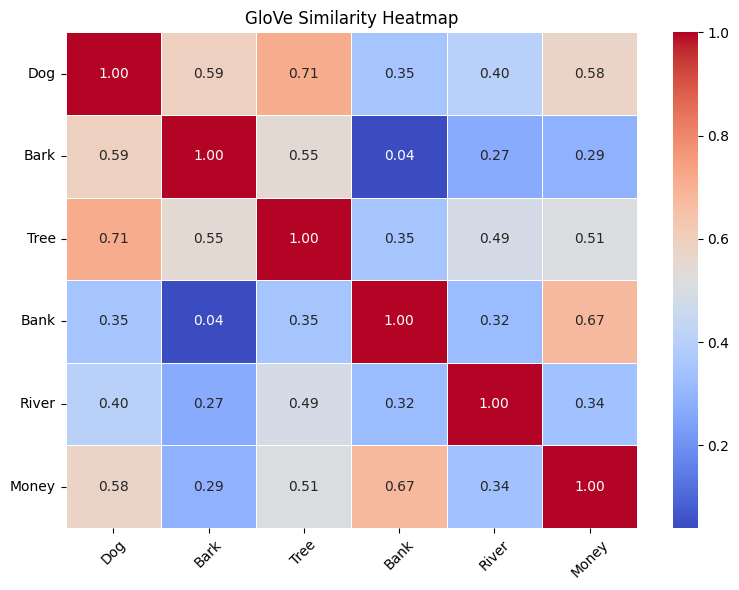

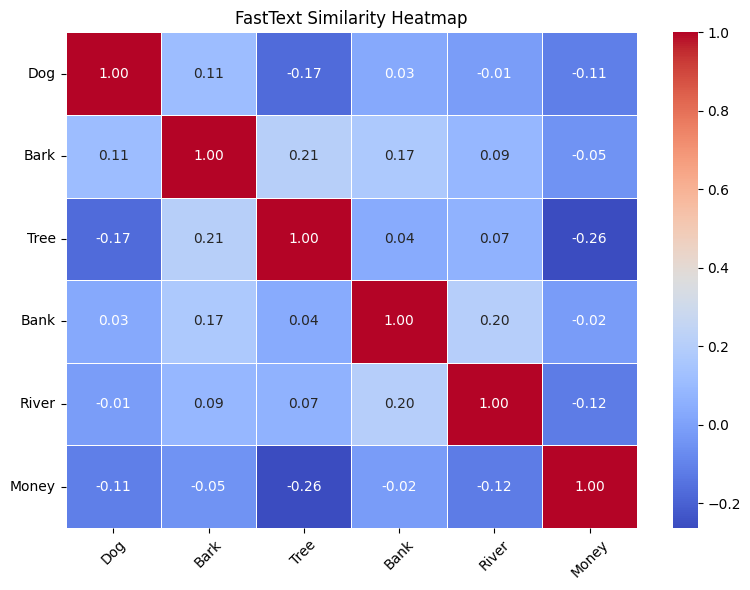

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

import seaborn as sns
import matplotlib.pyplot as plt

#heatmap from similarity matrix
def plot_heatmap(sim_matrix, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(sim_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

#plot Glove similarity heatmap
plot_heatmap(similarity_matrix, "GloVe Similarity Heatmap")

#plot Fasttext similarity heatmap
plot_heatmap(fasttext_similarity_matrix, "FastText Similarity Heatmap")


### Which embedding captures better semantics?

From the similarity scores heatmap the glove model does a better job at capturing word meanings compared to Fasttext.

The glove embeddings were trained on twitter, so they already good built in.

We can see this in these correctly correlated results:
- Dog and Bark have a decent similarity of 0.59.
- Bank and Money score 0.67.
- Bank and River got 0.32.

Fasttext was trained on a really small sample dataset so of course these resutls pail in comparison:
- Dog and Bark only scored 0.11
- Bank and Money had almost no connection at all at -0.02
- Some had negative scores, which shows the model is not learning the relationships.

Glove clearly captured better semantic relationships, but FastText could also if it was trained on a larger and better quality dataset like glove's twitter.

## 1.2 N-grams and Classification 

### 1.2 (a) - Split the data 70% training and 30% testing.

In [11]:
import pandas as pd
import nltk
from nltk.corpus import twitter_samples
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

nltk.download('twitter_samples')
nltk.download('stopwords')

positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')

all_tweets = positive_tweets + negative_tweets
labels = [1] * len(positive_tweets) + [0] * len(negative_tweets)

X_train, X_test, y_train, y_test = train_test_split(all_tweets, labels, test_size=0.3, random_state=77)


[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\Joseph\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Joseph\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### 1.2 (b) - Extract n-grams for n in [1, 4].

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

#set up countvectorizer for unigrams to 4-grams
vectorizers = {
    n: CountVectorizer(ngram_range=(n, n), stop_words='english')
    for n in range(1, 5)
}


### 2. (c) - Build a logistic regression model 

1-gram accuracy score: 0.7437
2-gram accuracy score: 0.6163
3-gram accuracy score: 0.5500
4-gram accuracy score: 0.5387


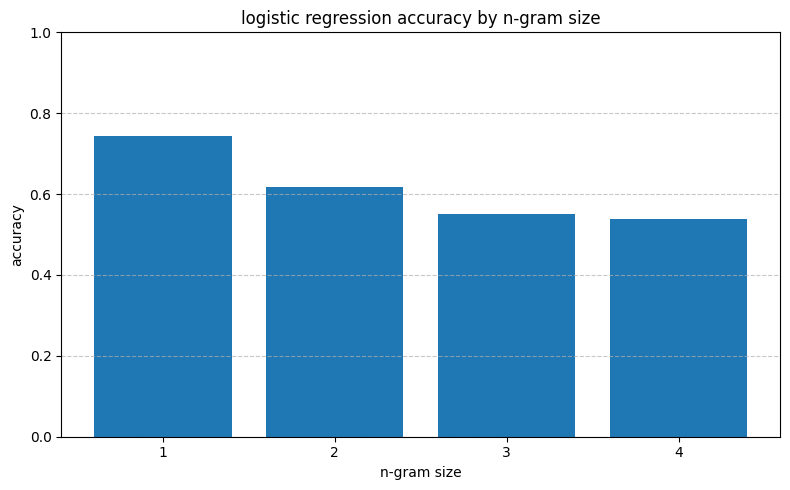

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

res = []

#train a logistic regression model for each n-gram and collect accuracy
for n, vectorizer in vectorizers.items():
    X_train_vec = vectorizer.fit_transform(X_train)
    X_test_vec = vectorizer.transform(X_test)

    model = LogisticRegression(max_iter=200)
    model.fit(X_train_vec, y_train)

    y_pred = model.predict(X_test_vec)
    acc = accuracy_score(y_test, y_pred)

    res.append((n, acc))
    print(f"{n}-gram accuracy score: {acc:.4f}")

#extract values for plotting
n_values = [n for n, _ in res]
acc_values = [acc for _, acc in res]

#plot accuracy vs. n-gram size
plt.figure(figsize=(8, 5))
plt.bar(n_values, acc_values)
plt.xlabel("n-gram size")
plt.ylabel("accuracy")
plt.title("logistic regression accuracy by n-gram size")
plt.xticks(n_values)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Logistic Regression Performance

The logistic regression model accuracy for each n gram size:

- 1-gram accuracy score: 0.7437
- 2-gram accuracy score: 0.6163
- 3-gram accuracy score: 0.5500
- 4-gram accuracy score: 0.5387

From the bar chart and printed values, we can see that:

- the model performed best with 1-gram, achieving accuracy of 74%.
- as n-gram size increased, accuracy declines.
- The 4-gram model was worst in accuracy, indicating that maybe the longer n size it wont generalize well, possibly due to overfitting as 1 gram was the best.

So unigrams provided the best performance. higher n-grams capture more specific patterns and hurt generalization.


### 1.2 (d) - How does the value of n in n-gram affect the model’s performance?

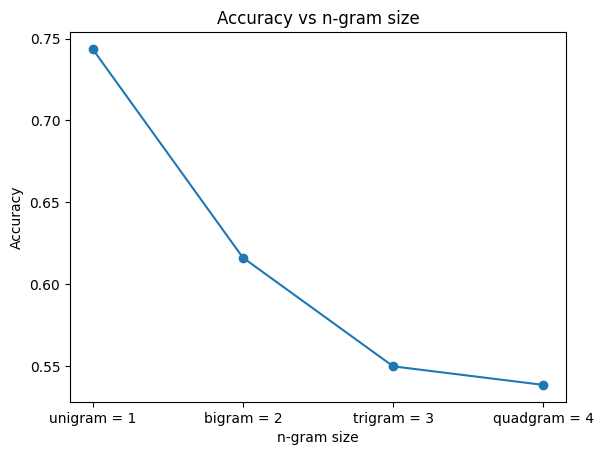

In [ ]:
unzipped = list(zip(*res)) #extract ngram sizes and accuracies

ngram_sizes, accuracy_scores = unzipped[0], unzipped[1]

#plot accuracy vs n-gram size
plt.plot(ngram_sizes, accuracy_scores, marker="o")
plt.title("Accuracy vs n-gram size")
plt.xlabel("n-gram size")
plt.ylabel("Accuracy")
# plt.grid(True)
# plt.xticks(ngram_sizes)
plt.xticks(ngram_sizes, labels=["unigram = 1", "bigram = 2", "trigram = 3", "quadgram = 4"])
plt.show()

#### How does the value of n in n-gram affect the model’s performance?

As the n increases, the model performance decreases. Unigrams got the best accuracy, while each in crease in n-gram size showed a drop in accuracy.

This is likely because larger n-grams lead to more sparse features. Higher-grams can capture more context, but they also result in combinations seen not enough times for learning. This can cause overfitting.

Unigrams performed best due to their simplicity and higher presence across the data most likely.


## Part 2 RNN and Machine Translation

In [ ]:
%pip install torch --index-url https://download.pytorch.org/whl/cu118

%pip install datasets evaluate

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://download.pytorch.org/whl/cu118
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [16]:
import torch

print("PyTorch version:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())
print("GPU device name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "None")


PyTorch version: 2.6.0+cu118
CUDA available: True
GPU device name: NVIDIA GeForce RTX 4080 SUPER


### 2.1 - Load the California State bill subset

In [ ]:
from datasets import load_dataset

#load billsum and split
billsum = load_dataset("billsum", split="ca_test")
billsum = billsum.train_test_split(test_size=0.2)


C:\Users\Joseph\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
from transformers import AutoTokenizer

#loads the tokenizer for the t5 model
text_tokenizer = AutoTokenizer.from_pretrained("t5-small")

#defines the input and summary length limits to test
TEXT_LEN_1024 = 1024
TEXT_LEN_2048 = 2048
SUMMARY_LEN_128 = 128
SUMMARY_LEN_256 = 256

#list of each length configuration by name and size
lengths = [
    {"name": "1024_128", "input_len": TEXT_LEN_1024, "summary_len": SUMMARY_LEN_128},
    {"name": "1024_256", "input_len": TEXT_LEN_1024, "summary_len": SUMMARY_LEN_256},
    {"name": "2048_128", "input_len": TEXT_LEN_2048, "summary_len": SUMMARY_LEN_128},
    {"name": "2048_256", "input_len": TEXT_LEN_2048, "summary_len": SUMMARY_LEN_256},
]

#dictionary to store the tokenized dataset for each setting
tokenized_by_length = {}

#function to tokenize one example using the input and summary limits
def encode_text_and_summary(example, input_len, summary_len):
    text_tokens = text_tokenizer(
        example["text"],
        max_length=input_len,           #tokenize the bill text
        truncation=True,
        padding="max_length"
    )

    summary_tokens = text_tokenizer(
        example["summary"],
        max_length=summary_len,            #tokenize the summary tex
        truncation=True,
        padding="max_length"
    )

    return {
        "input_ids": text_tokens["input_ids"],
        "attention_mask": text_tokens["attention_mask"],         #return a dictionary of token ids and attention mask - helps the model ignore the padding and focus on the real text which tokens are real (1) and which are just padding (0)
        "labels": summary_tokens["input_ids"]
    }

#loop through each length config and tokenize the dataset
for length in lengths:
    print(f"encoding for: {length['name']}")
    processed = billsum.map(
        lambda x: encode_text_and_summary(x, length["input_len"], length["summary_len"]),
        batched=True
    )
    tokenized_by_length[length["name"]] = processed

#print the names of the configs that were processed
print("\ntokenized seq lengths:")
for name in tokenized_by_length:
    print(f"- {name}")


encoding for: 1024_128


Map: 100%|██████████| 248/248 [00:00<00:00, 1004.05 examples/s]


encoding for: 1024_256


Map: 100%|██████████| 248/248 [00:00<00:00, 964.98 examples/s] 


encoding for: 2048_128


Map: 100%|██████████| 248/248 [00:00<00:00, 810.46 examples/s]


encoding for: 2048_256


Map: 100%|██████████| 248/248 [00:00<00:00, 756.09 examples/s]


tokenized seq lengths:
- 1024_128
- 1024_256
- 2048_128
- 2048_256


In [ ]:
from torch.utils.data import Dataset


#defines a custom dataset
class Seq2SeqDataset(Dataset):
    def __init__(self, data):
        self.input_ids = data["input_ids"]
        self.attention_mask = data["attention_mask"]
        self.labels = data["labels"]

    #returns the number of examples
    def __len__(self):
        return len(self.input_ids)

    #returns a single example as a dictionary of tensors
    def __getitem__(self, idx):
        return {
            "input_ids": torch.tensor(self.input_ids[idx], dtype=torch.long),
            "attention_mask": torch.tensor(self.attention_mask[idx], dtype=torch.long),
            "labels": torch.tensor(self.labels[idx], dtype=torch.long)
        }


### 2.2 && 2.3 - Model Setup and Varying Sequence Lengths

In [ ]:
import torch.nn as nn

#basic seq2seq model with LSTM encoder + decoder
class Seq2SeqLSTM(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim, input_len, target_len, dropout=0.1):
        super().__init__()

        #turn token IDs into word vectors
        self.embed = nn.Embedding(vocab_size, embed_dim)

        #encoder LSTM reads the input and gives us final hidden states
        self.encoder_lstm = nn.LSTM(embed_dim, hidden_dim, batch_first=True)

        #decoder LSTM uses encoder output and tries to generate summary
        self.decoder_lstm = nn.LSTM(embed_dim, hidden_dim, batch_first=True)

        #final layer that maps decoder output to vocab scores
        self.fc_out = nn.Linear(hidden_dim, vocab_size)

        #dropout
        self.dropout = nn.Dropout(dropout)

        #save input and output lengths just in case
        self.input_len = input_len
        self.target_len = target_len

    #runs input and target through the model
    def forward(self, src, tgt):
        #embed the input tokens and apply dropout
        embedded_src = self.dropout(self.embed(src))

        #pass input through encoder LSTM
        _, (hidden, cell) = self.encoder_lstm(embedded_src)

        #embed the decoder input (target tokens) and dropout
        embedded_tgt = self.dropout(self.embed(tgt))

        #pass through decoder LSTM using encoder's hidden states
        decoder_outputs, _ = self.decoder_lstm(embedded_tgt, (hidden, cell))

        #get vocab predictions from decoder outputs
        return self.fc_out(decoder_outputs)


In [21]:
def train_model(model, train_loader, optimizer, criterion, device, epochs=3):
    #set model to training mode
    model.train()

    for epoch in range(epochs):
        total_loss = 0

        for batch in train_loader:
            #move inputs and labels to the correct device
            input_ids = batch["input_ids"].to(device)
            labels = batch["labels"].to(device)

            #prepare decoder input and target by shifting labels
            decoder_input = labels[:, :-1]
            decoder_target = labels[:, 1:]

            #forward pass through the model
            outputs = model(input_ids, decoder_input)

            #reshape outputs and targets for loss calculation
            outputs = outputs.reshape(-1, outputs.shape[-1])
            decoder_target = decoder_target.reshape(-1)

            #calculate loss
            loss = criterion(outputs, decoder_target)

            #backpropagation and optimizer step
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            #accumulate batch loss
            total_loss += loss.item()

        #print average loss for the epoch
        print(f"Epoch {epoch+1}/{epochs} - Loss: {total_loss / len(train_loader):.4f}")


In [22]:
import evaluate

def evaluate_bleu(model, test_loader, tokenizer, device):
    #set model to evaluation mode
    model.eval()

    #load bleu evaluation metric
    bleu = evaluate.load("bleu")
    predictions, references = [], []

    with torch.no_grad():
        for batch in test_loader:
            #move input and labels to the device
            input_ids = batch["input_ids"].to(device)
            labels = batch["labels"].to(device)

            #prepare decoder input from labels
            decoder_input = labels[:, :-1]

            #get model predictions
            output_logits = model(input_ids, decoder_input)
            pred_ids = torch.argmax(output_logits, dim=-1)

            #decode predictions and labels to strings
            decoded_preds = tokenizer.batch_decode(pred_ids, skip_special_tokens=True)
            decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

            #collect results
            predictions.extend(decoded_preds)
            references.extend([[ref] for ref in decoded_labels])

    #compute and return bleu score
    score = bleu.compute(predictions=predictions, references=references)
    return score["bleu"]


In [ ]:
import os
from torch.utils.data import DataLoader

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#store bleu scores for eachg input and summary length combination
results = []

#loop through each input and summariy length config
for length in lengths:
    name = length["name"]
    input_len = length["input_len"]
    summary_len = length["summary_len"]

   #define the model save path using sequence lengths
    model_path = f"model_with_inputlen={input_len},summarylen={summary_len}.pt"

    #load the tokenized dataset for the current length setting
    data = tokenized_by_length[name]
    train_dataset = Seq2SeqDataset(data["train"])
    test_dataset = Seq2SeqDataset(data["test"])

    #create dataloaders for training and evaluation - wraps dataset and lets easily batch, shuffle, and load data during training 
    # helps avoid loading everything into memory at once and handles batching automatically
    train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=16)

    #initialize the model with the currentt sequence lengths
    model = Seq2SeqLSTM(
        vocab_size=text_tokenizer.vocab_size,
        embed_dim=128,
        hidden_dim=256,
        input_len=input_len,
        target_len=summary_len,
        dropout=0.3
    ).to(device)

    #load model if exists
    if os.path.exists(model_path):
        print(f"Loading found model: {model_path}")
        model.load_state_dict(torch.load(model_path, map_location=device))
        model.eval()
    else:
        print(f"\nTraining model for sequence lengths: {name}")
        optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
        criterion = nn.CrossEntropyLoss(ignore_index=text_tokenizer.pad_token_id)
        train_model(model, train_loader, optimizer, criterion, device, epochs=20)
        torch.save(model.state_dict(), model_path)

    #evaluate the model using bleu score and store the result
    bleu_score = evaluate_bleu(model, test_loader, text_tokenizer, device)
    results.append((name, bleu_score))
    print(f"BLEU score for {name}: {bleu_score:.4f}")



Training model for sequence lengths: 1024_128
Epoch 1/20 - Loss: 7.2116
Epoch 2/20 - Loss: 5.8558
Epoch 3/20 - Loss: 5.4673
Epoch 4/20 - Loss: 5.2014
Epoch 5/20 - Loss: 5.0020
Epoch 6/20 - Loss: 4.8375
Epoch 7/20 - Loss: 4.6952
Epoch 8/20 - Loss: 4.5693
Epoch 9/20 - Loss: 4.4529
Epoch 10/20 - Loss: 4.3488
Epoch 11/20 - Loss: 4.2549
Epoch 12/20 - Loss: 4.1677
Epoch 13/20 - Loss: 4.0849
Epoch 14/20 - Loss: 4.0067
Epoch 15/20 - Loss: 3.9373
Epoch 16/20 - Loss: 3.8704
Epoch 17/20 - Loss: 3.8072
Epoch 18/20 - Loss: 3.7438
Epoch 19/20 - Loss: 3.6879
Epoch 20/20 - Loss: 3.6328
BLEU score for 1024_128: 0.0713

Training model for sequence lengths: 1024_256
Epoch 1/20 - Loss: 7.1715
Epoch 2/20 - Loss: 5.9397
Epoch 3/20 - Loss: 5.5549
Epoch 4/20 - Loss: 5.2800
Epoch 5/20 - Loss: 5.0753
Epoch 6/20 - Loss: 4.9100
Epoch 7/20 - Loss: 4.7751
Epoch 8/20 - Loss: 4.6554
Epoch 9/20 - Loss: 4.5506
Epoch 10/20 - Loss: 4.4527
Epoch 11/20 - Loss: 4.3661
Epoch 12/20 - Loss: 4.2882
Epoch 13/20 - Loss: 4.2152
E

In [ ]:
#print all bleu scores for each sequence length config
print("\nFinal BLEU Scores:")
for name, score in results:
    print(f"{name}: BLEU = {score:.4f}")

#find the length config with the highest bleu score
best_seq_config = max(results, key=lambda x: x[1])

#print the best performing length
print("\nBest Sequence Length:")
print(f"Seq Len: {best_seq_config[0]}")
print(f"BLEU Score: {best_seq_config[1]:.4f}")



Final BLEU Scores:
1024_128: BLEU = 0.0713
1024_256: BLEU = 0.0774
2048_128: BLEU = 0.0776
2048_256: BLEU = 0.0819

Best Sequence Length:
Seq Len: 2048_256
BLEU Score: 0.0819


### 2.4 - Hyperparameting Tuning

In [ ]:
#define different sets of hyperparameters to try
hyperparameter_tunings = [
    {"name": "embed=128,hidden=256,dropout=0.3,lr=0.001", "embed_dim": 128, "hidden_dim": 256, "dropout": 0.3, "lr": 0.001},
    {"name": "embed=256,hidden=512,dropout=0.2,lr=0.0005", "embed_dim": 256, "hidden_dim": 512, "dropout": 0.2, "lr": 0.0005},
    {"name": "embed=512,hidden=512,dropout=0.1,lr=0.001", "embed_dim": 512, "hidden_dim": 512, "dropout": 0.1, "lr": 0.001},
                        ]

#select the sequence length setting that performed best from before
base_config = [length for length in lengths if length["name"] == best_seq_config[0]][0]
data = tokenized_by_length[base_config["name"]]

#prepare datasets and loaders based on the best sequence length
train_dataset = Seq2SeqDataset(data["train"])
test_dataset = Seq2SeqDataset(data["test"])
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16)

#store bleu scores for each tuned model
tuned_results = []

#loop through each of hyperparameters
for params in hyperparameter_tunings:
    #a path for saving or loading the model
    model_path = f"model_with_embed={params['embed_dim']},hidden={params['hidden_dim']},dropout={params['dropout']},learningrate={params['lr']}.pt"

    #initialize the model with the current hyperparameter values
    model = Seq2SeqLSTM(
        vocab_size=text_tokenizer.vocab_size,
        embed_dim=params["embed_dim"],
        hidden_dim=params["hidden_dim"],
        input_len=base_config["input_len"],
        target_len=base_config["summary_len"],
        dropout=params["dropout"]
    ).to(device)

    #load the model
    if os.path.exists(model_path):
        print(f"Loading model {model_path}")
        model.load_state_dict(torch.load(model_path, map_location=device))
        model.eval()
    else:
        print(f"\nTraining with parameters: {params['name']}")
        optimizer = torch.optim.Adam(model.parameters(), lr=params["lr"])
        criterion = nn.CrossEntropyLoss(ignore_index=text_tokenizer.pad_token_id)
        train_model(model, train_loader, optimizer, criterion, device, epochs=20)
        torch.save(model.state_dict(), model_path)

    #evaluate bleu score and store the resultk
    bleu_score = evaluate_bleu(model, test_loader, text_tokenizer, device)
    tuned_results.append((params["name"], bleu_score))
    print(f"BLEU score for {params['name']}: {bleu_score:.4f}")



Training with parameters: embed=128,hidden=256,dropout=0.3,lr=0.001
Epoch 1/20 - Loss: 7.2039
Epoch 2/20 - Loss: 5.9308
Epoch 3/20 - Loss: 5.5208
Epoch 4/20 - Loss: 5.2461
Epoch 5/20 - Loss: 5.0450
Epoch 6/20 - Loss: 4.8815
Epoch 7/20 - Loss: 4.7441
Epoch 8/20 - Loss: 4.6256
Epoch 9/20 - Loss: 4.5204
Epoch 10/20 - Loss: 4.4241
Epoch 11/20 - Loss: 4.3362
Epoch 12/20 - Loss: 4.2563
Epoch 13/20 - Loss: 4.1802
Epoch 14/20 - Loss: 4.1107
Epoch 15/20 - Loss: 4.0485
Epoch 16/20 - Loss: 3.9877
Epoch 17/20 - Loss: 3.9301
Epoch 18/20 - Loss: 3.8766
Epoch 19/20 - Loss: 3.8263
Epoch 20/20 - Loss: 3.7773
BLEU score for embed=128,hidden=256,dropout=0.3,lr=0.001: 0.0809

Training with parameters: embed=256,hidden=512,dropout=0.2,lr=0.0005
Epoch 1/20 - Loss: 7.1627
Epoch 2/20 - Loss: 5.7748
Epoch 3/20 - Loss: 5.3809
Epoch 4/20 - Loss: 5.1268
Epoch 5/20 - Loss: 4.9320
Epoch 6/20 - Loss: 4.7718
Epoch 7/20 - Loss: 4.6307
Epoch 8/20 - Loss: 4.5049
Epoch 9/20 - Loss: 4.3922
Epoch 10/20 - Loss: 4.2910
Epoc

In [ ]:
#find the hyperparameter setting with the highest bleu
best_param_config = max(tuned_results, key=lambda x: x[1])

#print best performing hyperparameter configv
print("\nBest hyperparameter setup:")
print(f"name: {best_param_config[0]}")
print(f"bleu score: {best_param_config[1]:.4f}")

#printthe best values for the best settings of params
for params in hyperparameter_tunings:
    if params["name"] == best_param_config[0]:
        final_hyperparams = params
        print("\nhyperparameters:")
        print(f"embedding dim: {params['embed_dim']}")
        print(f"hidden dim: {params['hidden_dim']}")
        print(f"dropout: {params['dropout']}")
        print(f"learning rate: {params['lr']}")



Best hyperparameter setup:
name: embed=512,hidden=512,dropout=0.1,lr=0.001
bleu score: 0.1518

hyperparameters:
embedding dim: 512
hidden dim: 512
dropout: 0.1
learning rate: 0.001


In [ ]:
#build the path to the bestmodel using selected hyperparams
final_model_path = f"model_with_embed={final_hyperparams['embed_dim']},hidden={final_hyperparams['hidden_dim']},dropout={final_hyperparams['dropout']},learningrate={final_hyperparams['lr']}.pt"

#initialize the model using the best seq length and hyperparams from before
final_model = Seq2SeqLSTM(
    vocab_size=text_tokenizer.vocab_size,
    embed_dim=final_hyperparams["embed_dim"],
    hidden_dim=final_hyperparams["hidden_dim"],
    input_len=base_config["input_len"],
    target_len=base_config["summary_len"],
    dropout=final_hyperparams["dropout"]
).to(device)

#load the saved tuned model from disk
final_model.load_state_dict(torch.load(final_model_path, map_location=device))
final_model.eval()

#prepare the test set based on the best seq length
final_data = tokenized_by_length[best_seq_config[0]]
final_test_dataset = Seq2SeqDataset(final_data["test"])
final_test_loader = DataLoader(final_test_dataset, batch_size=16)

#evaluate BLEUon the final model
final_bleu = evaluate_bleu(final_model, final_test_loader, text_tokenizer, device)
print(f"\nfinal best model bleu score: {final_bleu:.4f}")
print(f"model loaded from: {final_model_path}")

#save the final model filename
torch.save(final_model.state_dict(), "model_final_best_model.pt")
print("final model saved as: model_final_best_model.pt")



final best model bleu score: 0.1518
model loaded from: model_with_embed=512,hidden=512,dropout=0.1,learningrate=0.001.pt
final model saved as: model_final_best_model.pt


In [53]:
#select 5 examples from the test set (does amouunt matter?)
sample_batch = final_test_dataset[:5]

#move input and labels to device
input_ids = torch.tensor(sample_batch["input_ids"]).unsqueeze(0).to(device)
labels = torch.tensor(sample_batch["labels"]).to(device)

#set model to eval mode and get thier predictions
final_model.eval()
with torch.no_grad():
    decoder_input = labels[:, :-1]
    output_logits = final_model(input_ids.squeeze(0), decoder_input)
    pred_ids = torch.argmax(output_logits, dim=-1)

#decode the predictions and ground truth summaries
pred_summaries = text_tokenizer.batch_decode(pred_ids, skip_special_tokens=True)
ref_summaries = text_tokenizer.batch_decode(labels, skip_special_tokens=True)
og_texts = text_tokenizer.batch_decode(sample_batch["input_ids"], skip_special_tokens=True)

#print results
for i in range(len(og_texts)):
    print(f"\nInput Text {i+1}:\n{og_texts[i][:300]}...")
    print(f"reference Summary:\n{ref_summaries[i]}")
    print(f"predicted Summary:\n{pred_summaries[i]}")



Input Text 1:
The people of the State of California do enact as follows: SECTION 1. (a) The Legislature finds and declares all of the following: (1) All pupils deserve and need safe and supportive school environments in which to learn. (2) Pupils who are Muslim, Sikh, or of South Asian descent often face verbal, ...
reference Summary:
Existing law establishes the system of public elementary and secondary schools in this state, and provides for the establishment of local educational agencies to operate these schools and provide instruction to pupils. Existing law states the policy of the State of California to afford all persons in public schools, regardless of their disability, gender, gender identity, gender expression, nationality, race or ethnicity, religion, sexual orientation, or any other specified characteristic, equal rights and opportunities in the educational institutions of the state. Existing law, the Safe Place to Learn Act, requires the State Department of Education, as 

C:\Users\Joseph\AppData\Local\Temp\ipykernel_5268\1642782150.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input_ids = torch.tensor(sample_batch["input_ids"]).unsqueeze(0).to(device)
C:\Users\Joseph\AppData\Local\Temp\ipykernel_5268\1642782150.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(sample_batch["labels"]).to(device)


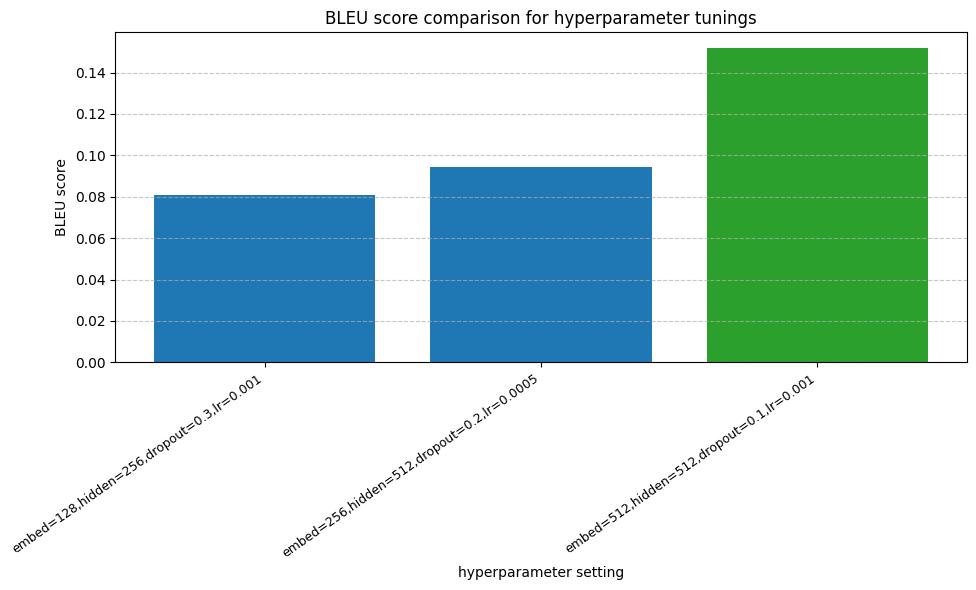

In [55]:
import matplotlib.pyplot as plt

#extract names and scores
names = [name for name, _ in tuned_results]
scores = [score for _, score in tuned_results]

#find best index
best_index = scores.index(max(scores))

#assign colors iu want green for best and blue fo rthe defualt
colors = ["tab:blue"] * len(scores)
colors[best_index] = "tab:green"

#plot
plt.figure(figsize=(10, 6))
plt.bar(names, scores, color=colors)
plt.ylabel("BLEU score")
plt.xlabel("hyperparameter setting")
plt.title("BLEU score comparison for hyperparameter tunings")
plt.xticks(rotation=35, ha="right", fontsize=9)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### RNN and Machine Translation Report

---

#### 1. Dataset and split prep

The dataset has texts and then truth summaries. The ca_test subset was loaded and split into training and testing sets using train_test_split() as shown in assigment.

---

#### 2. Number of neurons, dropout, and RNN architecture

For the initial seq2seq model:

- RNN Architecture: 2-layer LSTM encoder + decoder
- Embedding dimension: 128
- Hidden dimension: 256
- Dropout: 0.3
- Loss: Cross-Entropy ignoring padding index
- Evaluation Metric: BLEU

Then model tested on different combinations of the input lentghs and summary lengths from the assingment.

---

#### 3. Sequence length Impact

The following BLEU scores were recorded after training each configuration for 20 epochs:

- 1024_128, BLEU = 0.0713
- 1024_256, BLEU = 0.0774
- 2048_128, BLEU = 0.0776
- 2048_256, BLEU = 0.0819

##### Best Sequence length

- Input Length:   **2048** 
- Summary Length:     **256** 
- BLEU Score:      **0.0819**

- Increasing the input and summary lengths improved the BLEU scores.
- The best performance was made with the 2048_256 setting.

---

#### 4. Hyperparameter Tuning

The following combinations of embedding dimension, hidden dimension, dropout rate, and learning rate were tested:

- Configuration 1:
  - Embedding dimension: 128  
  - hidden dimension: 256  
  - Dropout: 0.3  
  - Learning rate: 0.001  
  - BLEU score: 0.0809

- Configuration 2:
  - Embedding dimension: 256  
  - Hidden dimension: 512  
  - Dropout: 0.2  
  - Learning rate: 0.0005  
  - BLEU score: 0.0945

- Configuration 3:
  - Embedding dimension: 512  
  - hidden dimension: 512  
  - Dropout: 0.1  
  - Learning rate: 0.001  
  - BLEU score: 0.1518

##### Best Hyperparameters

  - Embedding dimension:      **512**
  - Hidden dimension:      **512**  
  - Dropout:     **0.1**
  - Learning rate:    **0.001** 
  - BLEU score:   **0.1518**

This tuning nearly doubled BLEU from the base model from before.

---

#### 5. Final Best Model

The final model used:

- Sequence text length:    **2048 input, 256 summary**
- Embedding dimension:    **512**
- Hidden dimensions:    **512**
- Dropout:    **0.1**
- Learning rate:    **0.001**
- Epochs:    **20**
- Final BLEU score:   **0.1518**


The model was saved as: model_with_embed=512,hidden=512,dropout=0.1,learningrate=0.001.pt

and then reloaded as: ``` model_final_best_model.pt ```

---

#### 6. Generated Output Examples

5 examples were tested using the best model. The predicted summaries were more clear and relevant than the earlier ones I tested using fewer epochs and smaller embedding sizes, although those early tests weren’t shown in the final results because Im still learning how to manage notebooks and Pytorch. While the model did a better job capturing important information, the summaries still weren’t very strong overall, since the BLEU score was relatively low compared to what a large pre-trained model like T5 could produce.

---

#### Conclusion

Through careful tuning of both sequence length and  hyperparameters, I improved the BLEU score from ~0.05 to **0.15**, showing a meaningful improvement in the model's summarization ability using seq2seq learning.
